In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
## Utils and Library for notebook
from notebook_utils.OpenKbcMSToolkit import ExtractionToolkit as exttoolkit

# Root data path
DATA_PATH = '../data/'
cell = 'CD4'

#Data loading
df = pd.read_csv("resultFiles/Sex_analysis_by_Jun/extracted_genes_expr.csv", engine='c', index_col=0)
meta_data = pd.read_csv(DATA_PATH+'annotation_metadata/EPIC_HCvB_metadata_baseline_updated-share.csv').set_index('HCVB_ID')

inter_samples = list(set(meta_data.index.tolist()).intersection(df.columns.tolist()))
df = df[inter_samples]
meta_data = meta_data.loc[inter_samples]

In [3]:
mlist = meta_data.loc[meta_data['Sex']=='M'].index.tolist()
flist = meta_data.loc[meta_data['Sex']=='F'].index.tolist()

ranks_result = []
for x in df.index.tolist():
    mvalues = df[mlist].loc[x].values.tolist()
    fvalues = df[flist].loc[x].values.tolist()
    
    s, p = stats.ranksums(mvalues, fvalues)
    fchange = np.mean(mvalues) - np.mean(fvalues)

    ranks_result.append([x, p, fchange])
        
ranks_df = pd.DataFrame(data=ranks_result, columns=['gene', 'pval', 'fc'])

/opt/miniconda3/envs/r-py-test/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


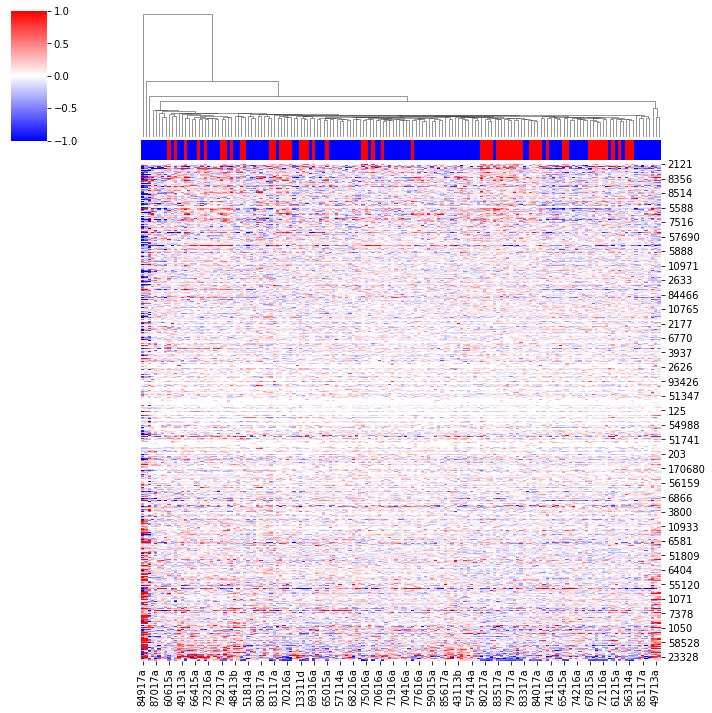

In [4]:
ordered_list = ranks_df.sort_values(by=['fc'], ascending=False)

lut_d = dict(zip(['M', 'F'], ['red', 'blue']))
sex_info = meta_data['Sex'].loc[df.columns.tolist()].values.tolist()
cated_mapx = [lut_d[x] for x in sex_info]

sns.clustermap(df.loc[ordered_list.gene.values.tolist()[10:]],col_colors=cated_mapx, row_cluster=False,  cmap='bwr', vmin=-1, vmax=1)

In [6]:
ordered_list[:10]

,gene,pval,fc
461,6192,3.013055e-25,5.829828
295,8284,3.013055e-25,5.683377
576,5616,3.013055e-25,5.566646
449,8653,3.013055e-25,5.436171
312,8287,3.013055e-25,5.414928
527,246126,3.013055e-25,5.140104
16,7404,3.013055e-25,4.902533
554,7544,3.013055e-25,3.396781
643,9086,3.013055e-25,2.624308
113,9087,3.013055e-25,1.204376
